# QQ-Plot

In diesem Jupyter Notebook untersuchen wir, wie wir entscheiden können, ob Daten normalverteilt sind oder nicht. Gehen wir zunächst von normalverteilten Daten aus. Wir simulieren Daten die normalverteilt mit $\mu=5$ und $\sigma=2$, also $X\sim\mathcal{N}(5,2^2)$. Das Histogramm ist normiert, das heisst, die Gesamtfläche des Histogrammes ist 1.

(-2, 12)

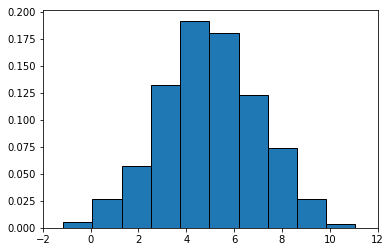

In [213]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

x_sim = pd.Series(norm.rvs(size=1000, loc=5, scale=2))

x_sim.hist(density="True", edgecolor="black", grid="False")
plt.xlim(-2, 12)

Nun zeichnen wir noch die entsprechende Normalverteilungskurve ein und zwar nicht diejenige von $X\sim\mathcal{N}(5,2^2)$, sondern diejenige mit Erwartungswert und Standardabweichung von x_sim. Erwartungswert und Standardabweichung sollte natürlich mit $\mu=5$ und $\sigma=2$ in etwa übereinstimmen. 

In [215]:
print(x_sim.mean())
print(x_sim.std())

4.991380597471678
2.009932755721224


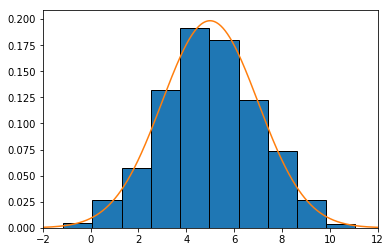

In [216]:
plt.xlim(-2, 12)
x_sim.hist(density="True", edgecolor="black", grid="False")

x = np.linspace(start=-2, stop=12, num=1000)
y = norm.pdf(x, loc=x_sim.mean(), scale=x_sim.std())

plt.plot(x,y)


plt.show()

Die Kurve passt also gut zum Histogramm. Wir können dies aber noch ein bisschen besser darstellen. Die ist die folgende: Wir nehmen von x_sim und y einige Quantile, beispielsweise in Abständen von 0.1. Wenn diese jeweils gleich sind, so stimmen Histogramm und Kurve auch überein. 

In [212]:
n = 10

x_sim_q = x_sim.quantile(q=np.linspace(0.1,1,n))
print(x_sim_q)

x_q = norm.ppf(q=np.linspace(0.1,1,n), loc=x_sim.mean(), scale=x_sim.std())
print(x_q)

print("Differenz \n",x_q-x_sim_q)

0.1     0.259893
0.2     0.409623
0.3     0.546531
0.4     0.703207
0.5     0.870175
0.6     1.069789
0.7     1.319616
0.8     1.663697
0.9     2.253460
1.0    14.385292
dtype: float64
[-0.08056626  0.32967705  0.62549134  0.87825375  1.11450469  1.35075563
  1.60351804  1.89933233  2.30957564         inf]
Differenz 
 0.1   -0.340460
0.2   -0.079945
0.3    0.078961
0.4    0.175047
0.5    0.244330
0.6    0.280967
0.7    0.283902
0.8    0.235635
0.9    0.056115
1.0         inf
dtype: float64


Wir sehen, dass die Quantile  praktisch übereinstimmen. Plotten wir diese so sehen wir, dass die Punkte auf einer Gerade liegen.

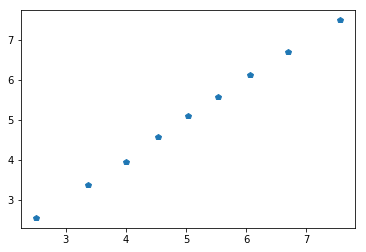

In [201]:
plt.plot(x_q, x_sim_q, 'p')

Nehmen wir nun eine Verteilung die nicht symmetrisch ist, zum Beispiel die F-Verteilung (für was die gebraucht wird, spielt hier keine Rolle)

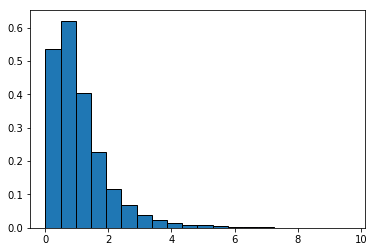

In [238]:
from scipy.stats import f
x_sim_f = pd.Series(f.rvs(size=10000, loc=0, scale=1, dfn=4, dfd=20))

x_sim_f.hist(density="True", edgecolor="black", grid="False", bins=20)

Mit der Normalverteilungskurve mit Erwartungswert und Standardabweichung von x_sim_f

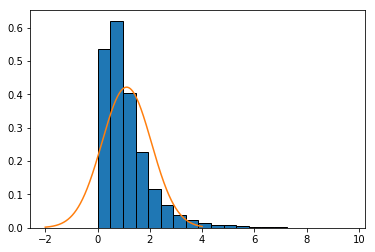

In [239]:
x_sim_f.hist(density="True", edgecolor="black", grid="False", bins=20)

x_f = np.linspace(start=-2, stop=4, num=1000)
y_f = norm.pdf(x_f, loc=x_sim_f.mean(), scale=x_sim_f.std())

plt.plot(x_f,y_f)

Die Normalverteilungskurve passt nicht zum Histogramm. Wir berechnen wieder die Quantile für x_sim_f und der Normalverteilungskurve.

In [233]:
n = 10

x_sim_f_q = x_sim_f.quantile(q=np.linspace(0.1,1,n))
print(x_sim_f_q)

x_f_q = norm.ppf(q=np.linspace(0.1,1,n), loc=x_sim_f.mean(), scale=x_sim_f.std())
print(x_f_q)

print("Differenz \n",x_f_q-x_sim_f_q)

0.1     0.259354
0.2     0.407762
0.3     0.545331
0.4     0.696493
0.5     0.857002
0.6     1.054466
0.7     1.288647
0.8     1.623582
0.9     2.228956
1.0    10.180233
dtype: float64
[-0.0788937   0.32554192  0.61716845  0.86635258  1.09925898  1.33216539
  1.58134951  1.87297604  2.27741166         inf]
Differenz 
 0.1   -0.338247
0.2   -0.082220
0.3    0.071837
0.4    0.169860
0.5    0.242257
0.6    0.277700
0.7    0.292703
0.8    0.249394
0.9    0.048456
1.0         inf
dtype: float64


Die Quantile unterscheiden sich hier, was sie auch müssen, da wir eine schiefe Verteilung mit einer Normalverteilung vergleichen. Plotten wir dies auf, so sehen wir, dass die Punkte nicht mehr auf einer Geraden liegen. 

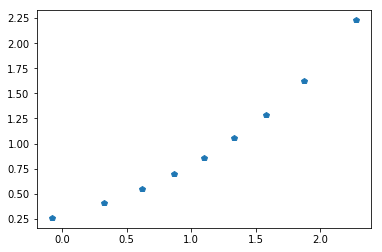

In [234]:
plt.plot(x_f_q, x_sim_f_q, 'p')

Um dies noch zu verdeutlichen, nehmen wir 1000 Punkte, dann wird die Krümmung offensichtlich. 

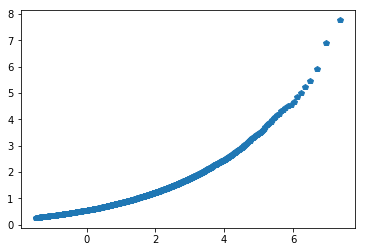

In [235]:
n = 1000

x_sim_f_q = x_sim_f.quantile(q=np.linspace(0.1,1,n))


x_f_q = norm.ppf(q=np.linspace(0.1,1,n), loc=x_sim_f.mean(), scale=x_sim.std())
plt.plot(x_f_q, x_sim_f_q, 'p')

Sind die Daten normalverteilt, so liegen diese Punkte auf einer Geraden. Liegen die Punkte nicht auf einer Geraden so sind die Daten _nicht_ normalverteilt.